*Francisco Pereira [camara@dtu.dk], DTU Management*

*Stanislav Borysov [stabo@dtu.dk], DTU Management*
# Advanced Business Analytics

## Lecture 1 - Web Data Mining - Part 2: Weather data

A lot of valuable data can be collected from online sources. It can be used to get insights, make predictions, etc. In this notebook, we're going to practice data collection from online sources using API. Particularly, we will collect social media data from Twitter and weather data from Weatherbit.

### 1. Getting weather data from https://www.weatherbit.io/

#### 1.1. Creating developer account

1. Register on the website
2. Get API key in the dashboard https://www.weatherbit.io/account/dashboard
**If you see the following message: "Your API Key is still provisioning. Provisioning can take up to 30 mins.", go to Part 3 until your key is ready.**

Note that the free plan includes:

- 500 calls/day
- 500 historical calls/day (trial)
- 1 month historical
- 16 day forecasts
- 48 hour forecasts (trial)
- Air Quality / Energy API (trial)
- Non-Commercial use only
- 95.0% Uptime
- Data update delay: 1 hour

So use your API calls carefully!

API documentation: https://www.weatherbit.io/api

#### 1.2. Getting current weather
https://www.weatherbit.io/api/weather-current

Current weather can be obtained as a response from such kind of url = 'https://api.weatherbit.io/v2.0/current?lat=X&lon=Y&key=api_key'

Let's get the weather for DTU. For that, we need the coordinates of DTU. You can use many different sources to get the coordinates, for example, Wikipedia or Google maps. For instance, coordinates of the little mermaid are ```lat=55.693019``` and ```lon=12.599266```.

In [64]:
api_key = '4bc5cee5a11e446787c53a2448c7f39c'
dtu_lat = '77.1177' 
dtu_lon = '28.7501'

Let's generate the request url and try it in the browser first. To format strings, the ```format``` function is very handy:
```
'lat={}&lon={}&key={}'.format(dtu_lat, dtu_lon, api_key)
```
will insert these three values into the string

In [65]:
'lat={}&lon={}&key={}'.format(dtu_lat, dtu_lon, api_key)

'lat=77.1177&lon=28.7501&key=4bc5cee5a11e446787c53a2448c7f39c'

Copy it to the browser and check if you get any response. To get response in python, we can use the ```urllib``` library: 
```
import urllib.request
contents = urllib.request.urlopen("http://example.com/foo/bar").read().decode("utf-8")
```

In [66]:
import urllib.request
contents = urllib.request.urlopen('https://api.weatherbit.io/v2.0/current?lat=77.1177&lon=28.7501&key=4bc5cee5a11e446787c53a2448c7f39c').read().decode("utf-8")
contents

'{"data":[{"rh":82.75,"pod":"n","lon":28.75,"pres":1010.5,"timezone":"Europe\\/Oslo","ob_time":"2021-02-05 21:28","country_code":"NO","clouds":100,"ts":1612560524,"solar_rad":0,"state_code":"05","city_name":"Mehamn","wind_spd":8.44499,"wind_cdir_full":"north-northeast","wind_cdir":"NNE","slp":1029,"vis":1,"h_angle":-90,"sunset":"13:06","dni":0,"dewpt":-6.9,"snow":0,"uv":0,"precip":0,"wind_dir":31,"sunrise":"07:39","ghi":0,"dhi":0,"aqi":null,"lat":77.12,"weather":{"icon":"c04n","code":804,"description":"Overcast Clouds"},"datetime":"2021-02-05:21","temp":-4.3,"station":"ENMH","elev_angle":-26.28,"app_temp":-10.3}],"count":1}\n'

As you can see, the response is a string, so let's parse it into a dictionary using the ```json``` library

In [67]:
import json
weather_dict = json.loads(contents)
weather_dict

{'data': [{'rh': 82.75,
   'pod': 'n',
   'lon': 28.75,
   'pres': 1010.5,
   'timezone': 'Europe/Oslo',
   'ob_time': '2021-02-05 21:28',
   'country_code': 'NO',
   'clouds': 100,
   'ts': 1612560524,
   'solar_rad': 0,
   'state_code': '05',
   'city_name': 'Mehamn',
   'wind_spd': 8.44499,
   'wind_cdir_full': 'north-northeast',
   'wind_cdir': 'NNE',
   'slp': 1029,
   'vis': 1,
   'h_angle': -90,
   'sunset': '13:06',
   'dni': 0,
   'dewpt': -6.9,
   'snow': 0,
   'uv': 0,
   'precip': 0,
   'wind_dir': 31,
   'sunrise': '07:39',
   'ghi': 0,
   'dhi': 0,
   'aqi': None,
   'lat': 77.12,
   'weather': {'icon': 'c04n', 'code': 804, 'description': 'Overcast Clouds'},
   'datetime': '2021-02-05:21',
   'temp': -4.3,
   'station': 'ENMH',
   'elev_angle': -26.28,
   'app_temp': -10.3}],
 'count': 1}

Look outside the window. Is it what you expected? :)

#### 1.3. Getting historical data

**UNFORTUNATELY, WEATHERBIT.IO CHANGED ACCESS TO HISTORICAL DATA WITHOUT SIGNING UP FOR A TRIAL VERSION. THE CODE IN THIS SUBSECTION MAY WORK DIFFERENTLY THAN ORIGINALLY PLANNED (but do try it) :(**

Historical weather data is usually more difficult to get for free because it has business value. Weatherbit.io offers 200 calls per day for the free account. It's not much but still enough for our purposes. It's better to use calls for 10 days not to exceed the limits at once (don't worry, the data for the further analysis will be provided).

To get historical weather, use the response from the following URL:

```https://api.weatherbit.io/v2.0/history/daily?city=Raleigh,NC&start_date=YYYY-MM-DD&end_date=YYYY-MM-DD&key=API_KEY```

You might want to check the full documentation here: https://www.weatherbit.io/api/weather-history-daily

The url requires specifying ```start_date``` and ```end_date```. Note that under the free plan the distance between them should not exceed one day, e.g. ```start_date=2018-09-17&end_date=2018-09-18```. So, let's generate a list of the dates for the requests first. In this case, our old good friend, the ```datatime``` library, will help us again. Use the ```timedelta``` function to generate the previous day:
```
import datetime
date_1 = "2018-08-31"
date_0 = datetime.datetime.strptime(date_1, "%Y-%m-%d") - datetime.timedelta(days=1)
date_0 = date_0.strftime("%Y-%m-%d") 
print(date_0) # will print "2018-08-30"
```

In [68]:
import datetime
date_1 = "2018-08-31"
date_0 = datetime.datetime.strptime(date_1, "%Y-%m-%d") - datetime.timedelta(days=1)
date_0 = date_0.strftime("%Y-%m-%d") 
print(date_0)

2018-08-30


Now, it's time to collect our data. Get a list of 10 historical weather observations and print it. Remember, you need to make a separate call to the website for each pair of dates. Use the json.loads(response) to parse the response string as in the previous exercise.

In [69]:
api_key = '4bc5cee5a11e446787c53a2448c7f39c'
start_date =date_0
end_date = "2018-08-31"

In [70]:
'start_date={}&end_date={}&key={}'.format(start_date, end_date, api_key)

'start_date=2018-08-30&end_date=2018-08-31&key=4bc5cee5a11e446787c53a2448c7f39c'

In [76]:
a='start_date={}&end_date={}&key={}'.format(start_date, end_date, api_key)
mainLink ="https://api.weatherbit.io/v2.0/history/daily?&lat=77.1177&lon=28.7501&"
link=mainLink + a
link

'https://api.weatherbit.io/v2.0/history/daily?&lat=77.1177&lon=28.7501&start_date=2018-08-30&end_date=2018-08-31&key=4bc5cee5a11e446787c53a2448c7f39c'

In [77]:
historical = urllib.request.urlopen(link).read().decode("utf-8")
historical

'{"timezone":"Europe\\/Oslo","state_code":"05","country_code":"NO","lat":77.1177,"lon":28.7501,"city_name":"Mehamn","station_id":"010160-99999","data":[{"rh":97.5,"max_wind_spd_ts":1535659200,"t_ghi":2931.7,"max_wind_spd":15,"solar_rad":120.6,"wind_gust_spd":15,"max_temp_ts":1535637600,"min_temp_ts":1535580000,"clouds":18,"max_dni":657.5,"precip_gpm":0,"wind_spd":7.5,"slp":1002.6,"ts":1535580000,"max_ghi":291.8,"temp":3.3,"pres":1000.1,"dni":356.6,"dewpt":3,"snow":null,"dhi":41.2,"precip":0,"wind_dir":172,"max_dhi":75.5,"ghi":122.2,"max_temp":3.9,"t_dni":8558.9,"max_uv":2.2,"t_dhi":988.5,"datetime":"2018-08-30","t_solar_rad":2893.2,"min_temp":2.6,"max_wind_dir":220,"snow_depth":null}],"sources":["010160-99999","imerg","merra2","era5","modis"],"city_id":"778707"}\n'

In [78]:
historical_dict = json.loads(historical)
historical_dict

{'timezone': 'Europe/Oslo',
 'state_code': '05',
 'country_code': 'NO',
 'lat': 77.1177,
 'lon': 28.7501,
 'city_name': 'Mehamn',
 'station_id': '010160-99999',
 'data': [{'rh': 97.5,
   'max_wind_spd_ts': 1535659200,
   't_ghi': 2931.7,
   'max_wind_spd': 15,
   'solar_rad': 120.6,
   'wind_gust_spd': 15,
   'max_temp_ts': 1535637600,
   'min_temp_ts': 1535580000,
   'clouds': 18,
   'max_dni': 657.5,
   'precip_gpm': 0,
   'wind_spd': 7.5,
   'slp': 1002.6,
   'ts': 1535580000,
   'max_ghi': 291.8,
   'temp': 3.3,
   'pres': 1000.1,
   'dni': 356.6,
   'dewpt': 3,
   'snow': None,
   'dhi': 41.2,
   'precip': 0,
   'wind_dir': 172,
   'max_dhi': 75.5,
   'ghi': 122.2,
   'max_temp': 3.9,
   't_dni': 8558.9,
   'max_uv': 2.2,
   't_dhi': 988.5,
   'datetime': '2018-08-30',
   't_solar_rad': 2893.2,
   'min_temp': 2.6,
   'max_wind_dir': 220,
   'snow_depth': None}],
 'sources': ['010160-99999', 'imerg', 'merra2', 'era5', 'modis'],
 'city_id': '778707'}

In [79]:
import datetime
date_1 = "2018-08-31"
date_0 = datetime.datetime.strptime(date_1, "%Y-%m-%d") - datetime.timedelta(days=1)
date_0 = date_0.strftime("%Y-%m-%d") 
print(date_0)

2018-08-30


In [81]:
contents = urllib.request.urlopen('https://api.weatherbit.io/v2.0/current?lat=77.1177&lon=28.7501&key=4bc5cee5a11e446787c53a2448c7f39c').read().decode("utf-8")
contents

'{"data":[{"rh":82.75,"pod":"n","lon":28.75,"pres":1010.5,"timezone":"Europe\\/Oslo","ob_time":"2021-02-05 21:28","country_code":"NO","clouds":100,"ts":1612560524,"solar_rad":0,"state_code":"05","city_name":"Mehamn","wind_spd":8.44499,"wind_cdir_full":"north-northeast","wind_cdir":"NNE","slp":1029,"vis":1,"h_angle":-90,"sunset":"13:06","dni":0,"dewpt":-6.9,"snow":0,"uv":0,"precip":0,"wind_dir":31,"sunrise":"07:39","ghi":0,"dhi":0,"aqi":null,"lat":77.12,"weather":{"icon":"c04n","code":804,"description":"Overcast Clouds"},"datetime":"2021-02-05:21","temp":-4.3,"station":"ENMH","elev_angle":-26.28,"app_temp":-10.3}],"count":1}\n'

In [82]:
observations = []
date_1 = "2018-08-31"
for i in range(10):
    date_0 = datetime.datetime.strptime(date_1, "%Y-%m-%d") - datetime.timedelta(days=1)
    date_0 = date_0.strftime("%Y-%m-%d") 
    contents = urllib.request.urlopen("https://api.weatherbit.io/v2.0/history/daily?&lat=77.1177&lon=28.7501&start_date="+date_0+"&end_date="+date_1+"&key="+api_key).read().decode("utf-8")
    observations.append(json.loads(contents))
    date_1 = date_0

In [63]:
observations

[{'timezone': 'Europe/Oslo',
  'state_code': '05',
  'country_code': 'NO',
  'lat': 77.1177,
  'lon': 28.7501,
  'city_name': 'Mehamn',
  'station_id': '010160-99999',
  'data': [{'rh': 97.5,
    'max_wind_spd_ts': 1535659200,
    't_ghi': 2931.7,
    'max_wind_spd': 15,
    'solar_rad': 120.6,
    'wind_gust_spd': 15,
    'max_temp_ts': 1535637600,
    'min_temp_ts': 1535580000,
    'clouds': 18,
    'max_dni': 657.5,
    'precip_gpm': 0,
    'wind_spd': 7.5,
    'slp': 1002.6,
    'ts': 1535580000,
    'max_ghi': 291.8,
    'temp': 3.3,
    'pres': 1000.1,
    'dni': 356.6,
    'dewpt': 3,
    'snow': None,
    'dhi': 41.2,
    'precip': 0,
    'wind_dir': 172,
    'max_dhi': 75.5,
    'ghi': 122.2,
    'max_temp': 3.9,
    't_dni': 8558.9,
    'max_uv': 2.2,
    't_dhi': 988.5,
    'datetime': '2018-08-30',
    't_solar_rad': 2893.2,
    'min_temp': 2.6,
    'max_wind_dir': 220,
    'snow_depth': None}],
  'sources': ['010160-99999', 'imerg', 'merra2', 'era5', 'modis'],
  'city_id':

Print the number of retrieved days and the first observation to check if the results are correct.

In [83]:
len(observations)

10

In [84]:
observations[0]

{'timezone': 'Europe/Oslo',
 'state_code': '05',
 'country_code': 'NO',
 'lat': 77.1177,
 'lon': 28.7501,
 'city_name': 'Mehamn',
 'station_id': '010160-99999',
 'data': [{'rh': 97.5,
   'max_wind_spd_ts': 1535659200,
   't_ghi': 2931.7,
   'max_wind_spd': 15,
   'solar_rad': 120.6,
   'wind_gust_spd': 15,
   'max_temp_ts': 1535637600,
   'min_temp_ts': 1535580000,
   'clouds': 18,
   'max_dni': 657.5,
   'precip_gpm': 0,
   'wind_spd': 7.5,
   'slp': 1002.6,
   'ts': 1535580000,
   'max_ghi': 291.8,
   'temp': 3.3,
   'pres': 1000.1,
   'dni': 356.6,
   'dewpt': 3,
   'snow': None,
   'dhi': 41.2,
   'precip': 0,
   'wind_dir': 172,
   'max_dhi': 75.5,
   'ghi': 122.2,
   'max_temp': 3.9,
   't_dni': 8558.9,
   'max_uv': 2.2,
   't_dhi': 988.5,
   'datetime': '2018-08-30',
   't_solar_rad': 2893.2,
   'min_temp': 2.6,
   'max_wind_dir': 220,
   'snow_depth': None}],
 'sources': ['010160-99999', 'imerg', 'merra2', 'era5', 'modis'],
 'city_id': '778707'}

Great! Now, you can access the data using the python dictionaries. For example, the wind speed for the first observation can be accessed as 

In [85]:
print(observations[0]['data'][0]['max_wind_spd'])

15


It is convenient to work with this type of data as a pandas dataframe. There are many ways how to create dataframe from the data. We'll use dictionaries, so let's do some preparation first. Fill the following dictionary with the values from the retrieved data:

In [88]:
data_dict = {
    'datetime': [],
    'state_code': [],
    'country_code': [],
    'lat': [],
    'lon': [],
    'city_name': [],
    'station_id': [],
    'ts': [],
    'rh': [],
    'clouds': [],
    'pres': [],
    'snow': [],
    'snow_depth': [],
    'precip': [],
    'wind_spd': [],
    'wind_dir': [],
    'max_wind_spd': [],
    'max_wind_dir': [],
    'wind_gust_spd': [],
    'temp': [],
    'max_temp': [],
    'min_temp': [],
}

In [89]:
for key in data_dict.keys():
    if key in ['state_code','country_code','lat','lon','city_name','station_id']:
        data_dict[key] = [observations[i][key] for i in range(10)]   
    else:
        data_dict[key] = [observations[i]['data'][0][key] for i in range(10)]

import pandas as pd
df = pd.DataFrame.from_dict(data_dict)
df.head()

,datetime,state_code,country_code,lat,lon,city_name,station_id,ts,rh,clouds,...,snow_depth,precip,wind_spd,wind_dir,max_wind_spd,max_wind_dir,wind_gust_spd,temp,max_temp,min_temp
0,2018-08-30,05,NO,77.1177,28.7501,Mehamn,010160-99999,1535580000,97.5,18,...,None,0,7.5,172,15,220,15,3.3,3.9,2.6
1,2018-08-29,05,NO,77.1177,28.7501,Mehamn,010160-99999,1535493600,91.7,22,...,None,0,6.2,205,9,230,9,2.2,3.0,0.4
2,2018-08-28,05,NO,77.1177,28.7501,Mehamn,010160-99999,1535407200,95.0,4,...,None,0,5.5,57,7,360,7,0.8,1.3,0.3
3,2018-08-27,05,NO,77.1177,28.7501,Mehamn,010160-99999,1535320800,87.8,2,...,None,0,2.7,177,5,360,5,2.0,3.2,1.0
4,2018-08-26,05,NO,77.1177,28.7501,Mehamn,010160-99999,1535234400,91.5,0,...,None,0,8.5,86,13,360,13,1.5,1.8,1.3


Now, ```import pandas as pd``` and use the ```df = pd.DataFrame.from_dict(data_dict)``` to create the dataframe. It's also convenient to set index to the ```'datetime'``` column. Finaly, use ```df.info()``` and ```df.head()``` to check if the created dataframe is correct.

Cool! Save the dataframe into a csv file using ```df.to_csv('my_dtu_weather.csv')```

In [102]:
df.to_csv('my_dtu_weather.csv')

#### 1.4. Plotting the data

Read the data to dataframe from the "dtu_weather_199.csv" file. You can use the ```pd.read_csv``` function with the following parameters: ```index_col='datetime'``` and ```parse_dates=True```.

In [108]:
data = pd.read_csv('my_dtu_weather.csv',index_col='datetime',parse_dates=True)
data

,Unnamed: 0,state_code,country_code,lat,lon,city_name,station_id,ts,rh,clouds,...,snow_depth,precip,wind_spd,wind_dir,max_wind_spd,max_wind_dir,wind_gust_spd,temp,max_temp,min_temp
datetime,,,,,,,,,,,,,,,,,,,,,
2018-08-30,0,5,NO,77.1177,28.7501,Mehamn,010160-99999,1535580000,97.5,18,...,NaN,0,7.5,172,15,220,15,3.3,3.9,2.6
2018-08-29,1,5,NO,77.1177,28.7501,Mehamn,010160-99999,1535493600,91.7,22,...,NaN,0,6.2,205,9,230,9,2.2,3.0,0.4
2018-08-28,2,5,NO,77.1177,28.7501,Mehamn,010160-99999,1535407200,95.0,4,...,NaN,0,5.5,57,7,360,7,0.8,1.3,0.3
2018-08-27,3,5,NO,77.1177,28.7501,Mehamn,010160-99999,1535320800,87.8,2,...,NaN,0,2.7,177,5,360,5,2.0,3.2,1.0
2018-08-26,4,5,NO,77.1177,28.7501,Mehamn,010160-99999,1535234400,91.5,0,...,NaN,0,8.5,86,13,360,13,1.5,1.8,1.3
2018-08-25,5,5,NO,77.1177,28.7501,Mehamn,010160-99999,1535148000,88.0,8,...,NaN,0,7.3,36,12,70,12,1.9,2.3,0.9
2018-08-24,6,5,NO,77.1177,28.7501,Mehamn,010160-99999,1535061600,88.7,49,...,NaN,0,8.9,20,10,30,10,2.0,2.8,1.4
2018-08-23,7,5,NO,77.1177,28.7501,Mehamn,010160-99999,1534975200,86.0,65,...,NaN,0,3.3,58,8,340,8,3.0,4.5,1.3
2018-08-22,8,5,NO,77.1177,28.7501,Mehamn,010160-99999,1534888800,88.0,68,...,NaN,0,1.4,265,2,330,2,2.7,4.0,1.7


In [113]:
data['max_temp']

datetime
2018-08-30    3.9
2018-08-29    3.0
2018-08-28    1.3
2018-08-27    3.2
2018-08-26    1.8
2018-08-25    2.3
2018-08-24    2.8
2018-08-23    4.5
2018-08-22    4.0
2018-08-21    2.6
Name: max_temp, dtype: float64

Let's make some plots. Plot maximum, minimum and average temperature.

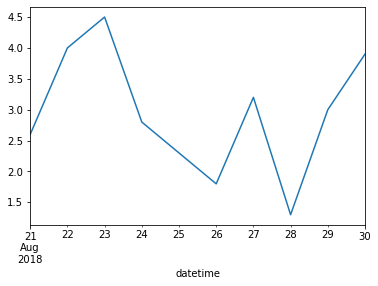

In [118]:
# max
data['max_temp'].plot(kind='line')

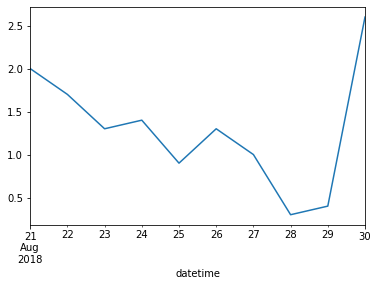

In [115]:
#min
data['min_temp'].plot(kind='line')

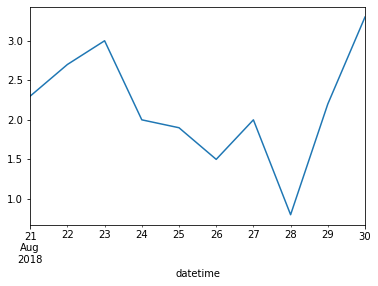

In [117]:
#average
data['temp'].plot(kind='line')

To plot wind speed depending on wind direction, polar plots are helpful. Check https://matplotlib.org/gallery/pie_and_polar_charts/polar_demo.html for the details.

Hints:
- polar plots are using radians instead of degrees, so create another column ```'wind_dir_rad'``` using a function from numpy ```np.radians()```
- to align 0 to the north and enforce clock-wise direction, you can use  ```ax.set_theta_zero_location('N')``` and 
```ax.set_theta_direction(-1)``` respectively

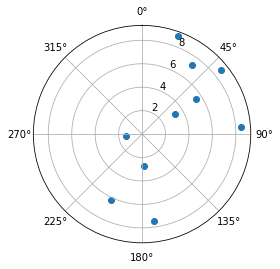

In [119]:
import numpy as np

#df['wind_dir_rad'] = df['wind_dir'].apply(lambda x: np.radians(x))
df['wind_dir_rad'] = np.radians(df['wind_dir'])

ax = plt.subplot(111, projection='polar')
ax.scatter(df['wind_dir_rad'], df['wind_spd'])
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
plt.show()

The wind data is a bit scattered. A better representation might be to plot mean and standard deviation for each wind direction. For example, the mean can be computed as 
```
mean = df['wind_spd'].groupby([df['wind_dir_rad']]).mean()
```

Hint: To plot standard deviation, you can plot the two lines corresponding to mean +/- std

In [12]:
#...

It seems that we have too few data points for each wind direction to get useful insights. Let's try to aggregate data by the 16 main wind directions (North, North-NorthEast, NorthEast, etc). We can use the ```round_degrees()``` function defined below to round the wind direction. Create new column 'wind_dir_agg_rad' in the dataframe using this function.

Siderequest: Can you rewrite this 'ugly' function to make it more 'elegant'?

In [29]:
def round_degrees(val):
    if val >= 348.75 or val < 11.25:
         return 0.0
    elif val >= 11.25 and val < 33.75:
         return 22.5
    elif val >= 33.75 and val < 56.25:
         return 45.0
    elif val >= 56.25 and val < 78.75:
         return 67.5
    elif val >= 78.75 and val < 101.25:
         return 90.0
    elif val >= 101.25 and val < 123.75:
         return 112.5
    elif val >= 123.75 and val < 146.25:
         return 135.0
    elif val >= 146.25 and val < 168.75:
         return 157.5
    elif val >= 168.75 and val < 191.25:
         return 180.0
    elif val >= 191.25 and val < 213.75:
         return 202.5
    elif val >= 213.75 and val < 236.25:
         return 225.0
    elif val >= 236.25 and val < 258.75:
         return 247.5
    elif val >= 258.75 and val < 281.25:
         return 270.0
    elif val >= 281.25 and val < 303.75:
         return 292.5
    elif val >= 303.75 and val < 326.25:
         return 315.0
    elif val >= 326.25 and val < 348.75:
         return 337.5

In [14]:
#...

Finally, let's try again to plot the aggregated values.

In [13]:
#...

Much better! We can see that the most strong wind direction was East-NorthEast (ENE or 67.5 degrees). Also, there was no wind from the north. Might it be related to the great summer we had that year in Denmark?